In [80]:
import numpy as np
from scipy.stats import spearmanr
import pandas as pd
import seaborn as sns
from rdkit import Chem, RDLogger, DataStructs
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect, \
                                        GetMACCSKeysFingerprint
from rdkit.Chem.rdmolops import RDKFingerprint

In [81]:
l_mol_objs = Chem.SmilesMolSupplier("SMILES_tutorial.txt",delimiter='\t',titleLine=False)

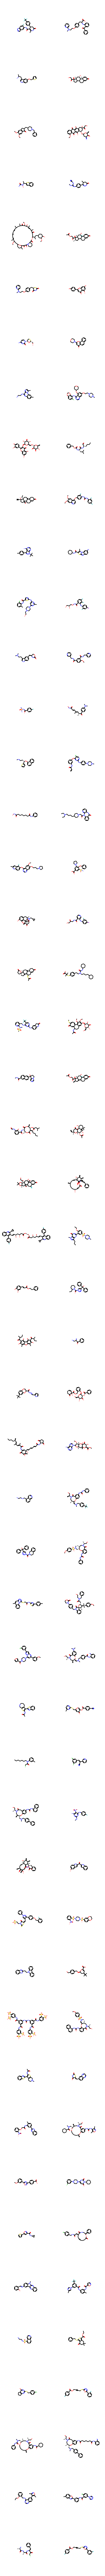

In [82]:
Draw.MolsToGridImage(l_mol_objs, molsPerRow=2)

In [83]:
def similarity(fps):
    sim = []
    for ind_i, fg in enumerate(fps):
        sim.append([])
        for ind_j in range(0, ind_i + 1):
            if ind_i != ind_j:
                sim[ind_i].append(DataStructs.TanimotoSimilarity(fps[ind_i],fps[ind_j]))
            else:
                sim[ind_i].append(0)
    return sim

In [84]:
def mol_drawer(sim_func, fps, l_mol_objs, n):
    sim = sim_func(fps) #counting similarity scores
    """
    Creating a list of tuples with simularity /
        score and indexes of molecules in i_mol_objs

    """
    max_sim = []
    for i in range(len(sim)):
        max_sim.append((sim[i][np.argmax(sim[i])],i,np.argmax(sim[i])))
    max_sim = sorted(max_sim)
    """
    Extracting 4 pairs of most similar molecules / 
         from sorted l_mol_objs according to their /
             similarity score to be visialized

    """
    out = []
    for i in range(n):
        out.append(l_mol_objs[max_sim[len(max_sim)-1-i][1]])
        out.append(l_mol_objs[int(max_sim[len(max_sim)-1-i][2])])
        print(max_sim[len(max_sim)-1-i])
    return max_sim, Draw.MolsToGridImage(out, molsPerRow=2)

In [85]:
fps = [GetMorganFingerprintAsBitVect(molecule, 2) for molecule in l_mol_objs]

In [86]:
#Draw.DrawMorganBits(fps[1]) не работает, ААААААААААА!

In [87]:
print(DataStructs.TanimotoSimilarity(fps[1],fps[3]))

0.06930693069306931


In [88]:
sim = similarity(fps)

In [89]:
pd.DataFrame(sim)

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.105769,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.095745,0.133333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.101010,0.069307,0.043478,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.105263,0.118280,0.135802,0.101124,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.131148,0.170940,0.096491,0.100840,0.154545,0.135338,0.140000,0.116071,0.132075,0.103175,...,0.084112,0.132743,0.083333,0.101695,0.365217,0.000000,NaN,NaN,NaN,NaN
94,0.077670,0.111111,0.152941,0.061224,0.136364,0.107143,0.101266,0.088889,0.062500,0.066667,...,0.098765,0.147727,0.058824,0.107527,0.092437,0.099174,0.000000,NaN,NaN,NaN
95,0.148515,0.127451,0.072917,0.090000,0.093750,0.102564,0.121951,0.095745,0.082192,0.054054,...,0.105882,0.104167,0.091954,0.113402,0.134454,0.150000,0.132653,0.000000,NaN,NaN
96,0.102273,0.230769,0.150685,0.084337,0.162162,0.100000,0.196721,0.090909,0.069231,0.076923,...,0.136364,0.175676,0.101449,0.126582,0.148515,0.166667,0.095238,0.127907,0.000,NaN


In [90]:
max_sim, pictures = mol_drawer(similarity, fps, l_mol_objs, 4)

(1.0, 41, 9)
(0.85, 77, 59)
(0.717391304347826, 93, 68)
(0.711864406779661, 97, 91)


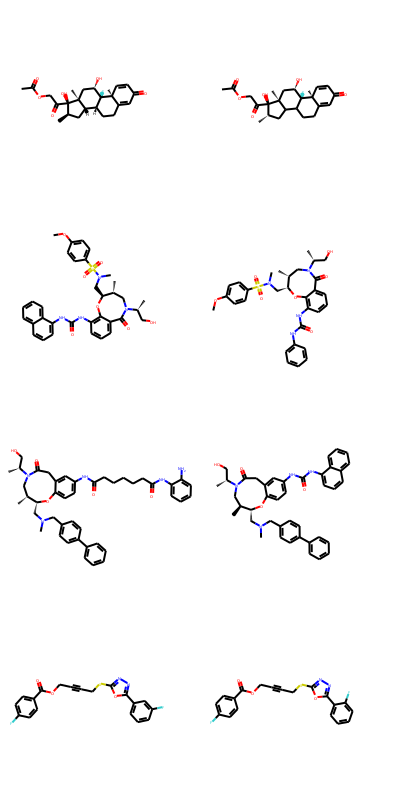

In [91]:
pictures

In [92]:
fps_1 = [GetMACCSKeysFingerprint(molecule) for molecule in l_mol_objs]

In [93]:
sim_1 = similarity(fps_1)

In [94]:
pd.DataFrame(sim_1)

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.357143,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.357143,0.417910,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.307692,0.360000,0.296875,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.282051,0.538462,0.372881,0.375000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.415730,0.680000,0.407895,0.443038,0.534247,0.623377,0.294118,0.402439,0.653846,0.416667,...,0.351648,0.341463,0.380952,0.325843,0.876712,0.000000,NaN,NaN,NaN,NaN
94,0.434211,0.472973,0.451613,0.259740,0.461538,0.440000,0.309859,0.361111,0.333333,0.259259,...,0.325000,0.409091,0.375000,0.402778,0.481481,0.475610,0.000000,NaN,NaN,NaN
95,0.552239,0.350649,0.307692,0.150000,0.343284,0.271605,0.419355,0.430769,0.289157,0.182927,...,0.278481,0.222222,0.382353,0.500000,0.419753,0.432099,0.477612,0.000000,NaN,NaN
96,0.304348,0.363636,0.339623,0.278689,0.266667,0.412698,0.321429,0.338983,0.367647,0.276923,...,0.298507,0.233333,0.269841,0.281250,0.364865,0.436620,0.214286,0.333333,0.000000,NaN


In [95]:
max_sim_1, pictures_1 = mol_drawer(similarity, fps_1, l_mol_objs, 4)

(1.0, 77, 59)
(1.0, 41, 9)
(0.9591836734693877, 97, 91)
(0.9142857142857143, 92, 68)


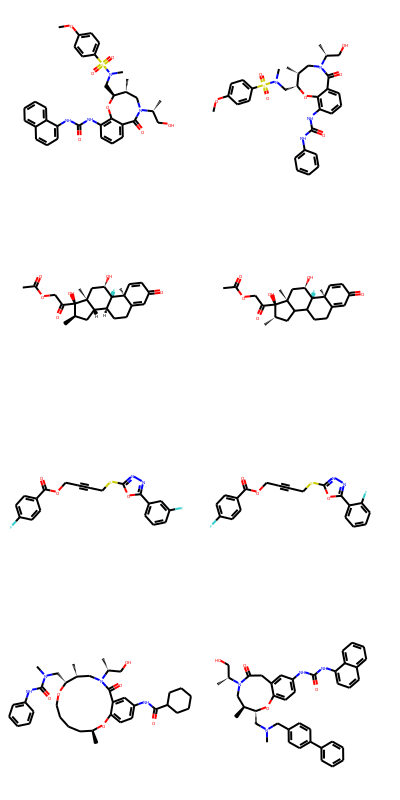

In [96]:
pictures_1

In [97]:
fps_2 = [RDKFingerprint(molecule) for molecule in l_mol_objs]

In [98]:
sim_2 = similarity(fps_2)

In [99]:
pd.DataFrame(sim_2)

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.354465,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.310617,0.314783,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.273913,0.192562,0.180313,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.322581,0.346187,0.289762,0.213382,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.423598,0.365801,0.303008,0.243647,0.377402,0.459908,0.260150,0.251524,0.404459,0.312585,...,0.189125,0.404203,0.288433,0.303584,0.600730,0.000000,NaN,NaN,NaN,NaN
94,0.368522,0.327511,0.310236,0.222222,0.311263,0.429395,0.244771,0.236635,0.354471,0.293706,...,0.198003,0.375156,0.279123,0.295764,0.393701,0.388323,0.000000,NaN,NaN,NaN
95,0.398859,0.322378,0.288905,0.252449,0.288697,0.438171,0.245536,0.250000,0.369173,0.306748,...,0.190363,0.397783,0.301258,0.326379,0.399106,0.384010,0.386024,0.000000,NaN,NaN
96,0.260337,0.254477,0.235232,0.162447,0.264132,0.241875,0.188901,0.223103,0.234410,0.186189,...,0.139591,0.231988,0.222449,0.197252,0.234671,0.264874,0.190209,0.202483,0.000000,NaN


In [100]:
max_sim_2, pictures_2 = mol_drawer(similarity, fps_2, l_mol_objs, 4)

(1.0, 41, 9)
(0.965464313123561, 77, 59)
(0.9063829787234042, 78, 64)
(0.8465562336530078, 93, 68)


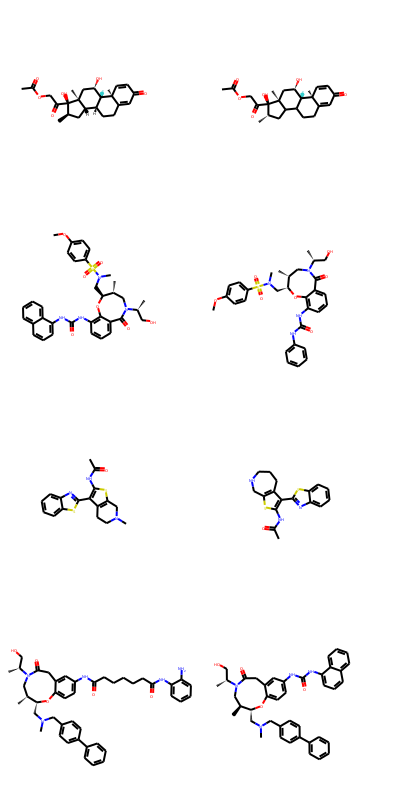

In [101]:
pictures_2

In [102]:
for_comp = []
for_comp_1 = []
for_comp_2 = []
for i in range(len(max_sim)):
    if max_sim[i][0]>=0.75:
        for_comp.append(max_sim[i])
    if max_sim_1[i][0]>=0.75:
        for_comp_1.append(max_sim_1[i])  
    if max_sim_2[i][0]>=0.75:
        for_comp_2.append(max_sim_2[i])
        
pd.DataFrame({"Morgan": for_comp})

,Morgan
0,"(0.85, 77, 59)"
1,"(1.0, 41, 9)"


In [103]:
pd.DataFrame({"MACCKeys":for_comp_1})

,MACCKeys
0,"(0.75, 83, 29)"
1,"(0.7558139534883721, 59, 57)"
2,"(0.7611940298507462, 45, 8)"
3,"(0.8, 70, 45)"
4,"(0.8166666666666667, 58, 49)"
5,"(0.8214285714285714, 44, 9)"
6,"(0.8269230769230769, 9, 3)"
7,"(0.8333333333333334, 63, 57)"
8,"(0.8333333333333334, 81, 68)"
9,"(0.8767123287671232, 93, 92)"


In [104]:
pd.DataFrame({"RDKit":for_comp_2})

,RDKit
0,"(0.7762962962962963, 92, 81)"
1,"(0.8390052356020943, 97, 91)"
2,"(0.8462913315460232, 63, 57)"
3,"(0.8465562336530078, 93, 68)"
4,"(0.9063829787234042, 78, 64)"
5,"(0.965464313123561, 77, 59)"
6,"(1.0, 41, 9)"


In [105]:
sim = pd.DataFrame(sim)
sim_1 = pd.DataFrame(sim_1)
sim_2 = pd.DataFrame(sim_2)
col_1 = []
col_2 = []
col_3 = []
for ind, fp in enumerate(sim):
    for j in range(ind+1,len(sim)):
        col_1.append(sim[ind][j])
        col_2.append(sim_1[ind][j])
        col_3.append(sim_2[ind][j])

In [106]:
inp = {"Morgan": col_1, "MACCKeys":col_2, "RDKit":col_3}
sim_matrix = pd.DataFrame(inp)
sim_matrix

,Morgan,MACCKeys,RDKit
0,0.105769,0.357143,0.354465
1,0.095745,0.357143,0.310617
2,0.101010,0.307692,0.273913
3,0.105263,0.282051,0.322581
4,0.093220,0.395062,0.495756
...,...,...,...
4748,0.095238,0.214286,0.190209
4749,0.118280,0.375000,0.285054
4750,0.127907,0.333333,0.202483
4751,0.172043,0.468750,0.317388


In [107]:
sim_matrix.corr(method = 'spearman')

,Morgan,MACCKeys,RDKit
Morgan,1.000000,0.491798,0.248489
MACCKeys,0.491798,1.000000,0.592545
RDKit,0.248489,0.592545,1.000000


<AxesSubplot:>

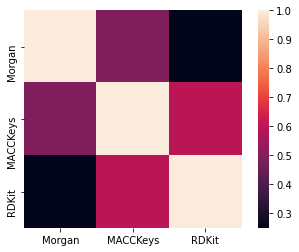

In [108]:
sns.heatmap(sim_matrix.corr(method = 'spearman'),square = True)